# Tutorial de MATPLOTLIB

**Matplotlib** es una biblioteca para la creación de gráficos muy utilizada en el lenguaje de programación Python. 

Su webpage es: https://matplotlib.org/

La documentación de esta librería es el PDF http://matplotlib.org/Matplotlib.pdf el cual tiene 1827 hojas (versión 2.1.0). La versión web asociada es: https://matplotlib.org/contents.html

Como la documentación es tan grande, se recomienda mirar:
* la galería de imágenes:  http://matplotlib.org/gallery/index.html 
* la lista de ejemplos: https://matplotlib.org/examples/index.html

y buscar una imagen similar a la que uno quiere generar.

In [1]:
#%matplotlib inline
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
# import seaborn   # quite y ponga esta línea

NOTA: seaborn es una librería que cambia el estilo por defecto de las figuras de matplotlib

<IPython.core.display.Javascript object>


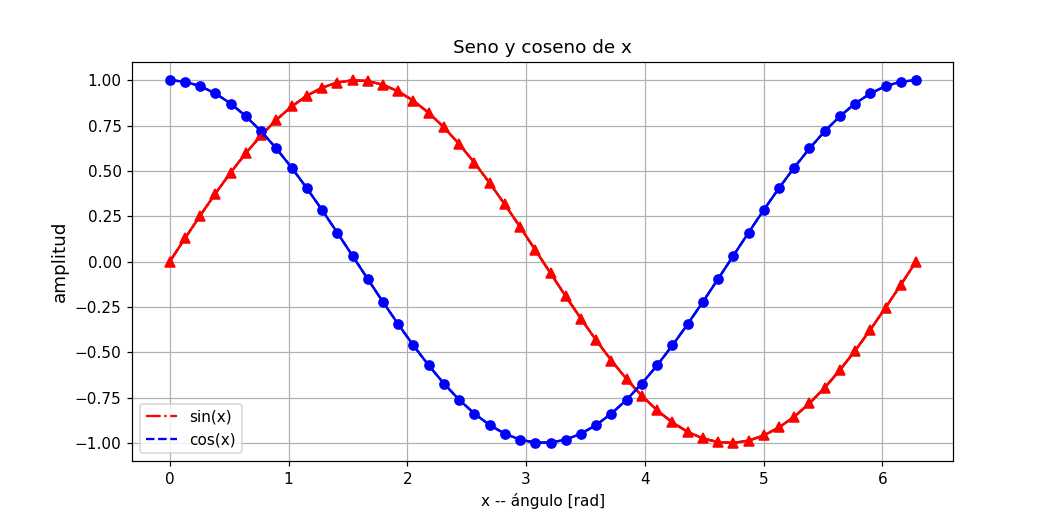

In [2]:
x = np.linspace(0, 2*np.pi, 50)
plt.plot(x, np.sin(x))

In [3]:
plt.plot(x, np.sin(x), x, np.cos(x))

In [4]:
plt.plot(x, np.sin(x), 'r-^', x, np.cos(x), 'b-o')
plt.legend(['sin(x)','cos(x)'], loc='best')
# ver ayuda del comando plot

In [5]:
# Observe que a diferencia de MATLAB, no se necesita un "hold on"
plt.plot(x, np.sin(x), 'r-.', label='sin(x)')
plt.plot(x, np.cos(x), 'b--', label='cos(x)')
plt.legend()
plt.xlabel('x -- ángulo [rad]')
plt.ylabel('amplitud', fontsize='large')
plt.title('Seno y coseno de x')
plt.grid()
# ver ayuda del comando legend

<IPython.core.display.Javascript object>


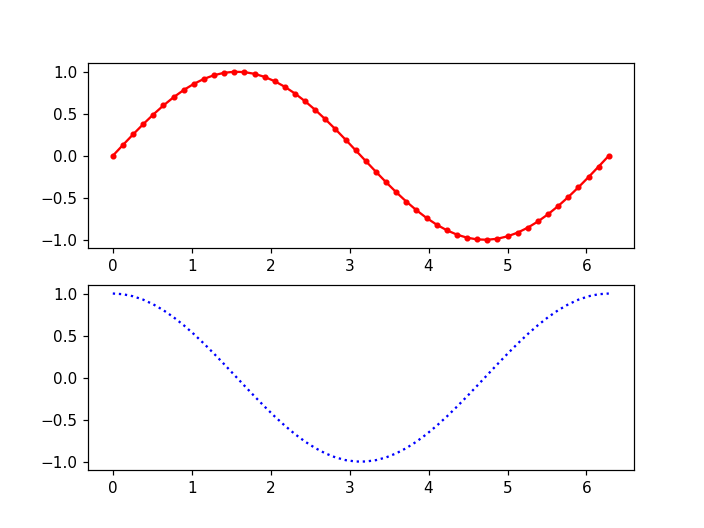

In [6]:
plt.figure()         # crea un nuevo lienzo, de forma similar a MATLAB
plt.subplot(2,1,1)   # filas=2, columna=1, dibujo activo=1
plt.plot(x, np.sin(x), 'r.-')
plt.subplot(2,1,2)   # filas=2, columna=1, dibujo activo=2
plt.plot(x, np.cos(x), 'b:')

<IPython.core.display.Javascript object>


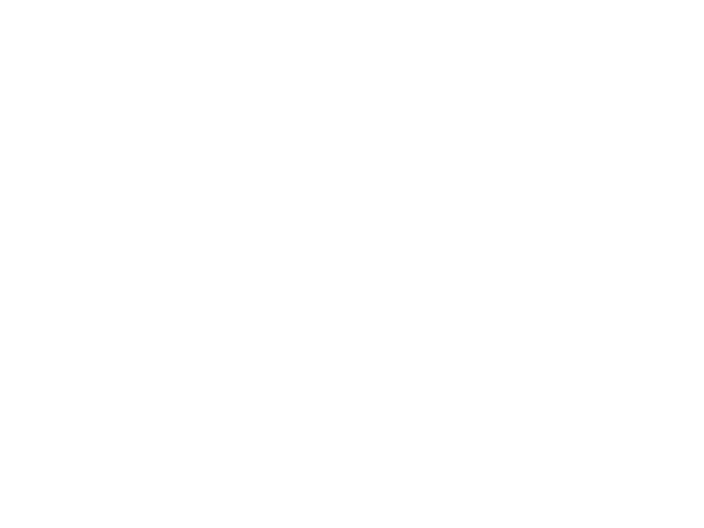

<IPython.core.display.Javascript object>


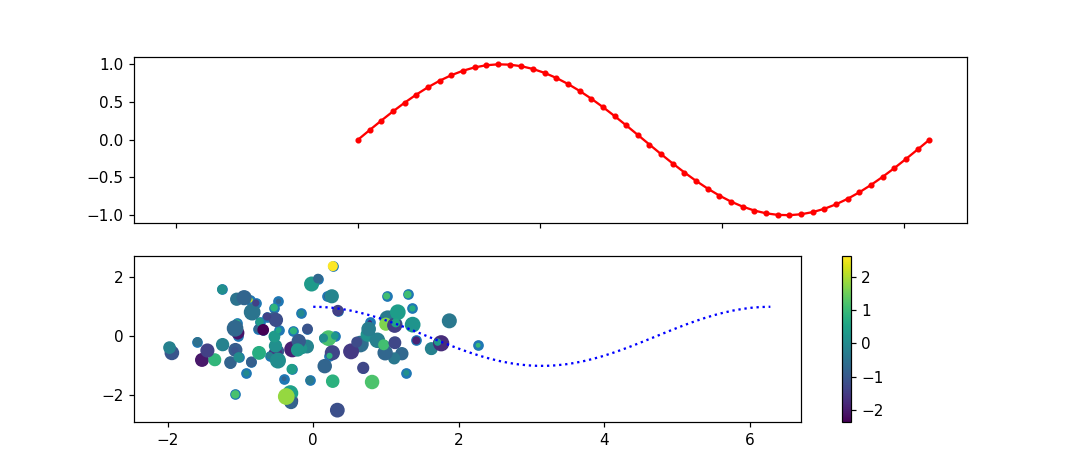

In [7]:
plt.figure()         # crea un nuevo lienzo, de forma similar a MATLAB
f, axes = plt.subplots(2,1, sharex=True)
axes[0].plot(x, np.sin(x), 'r.-')
axes[1].plot(x, np.cos(x), 'b:')

In [8]:
x      = np.random.standard_normal(size=100)
y      = np.random.standard_normal(size=100)
plt.scatter(x, y)

# ver axis equal, axis tight


In [19]:
tamaño = np.random.uniform(0,100,size=100)
color  = np.random.normal(size=100)
plt.scatter(x, y, tamaño, color)
plt.colorbar()

# ver colormaps, y como cambiarlos

<IPython.core.display.Javascript object>


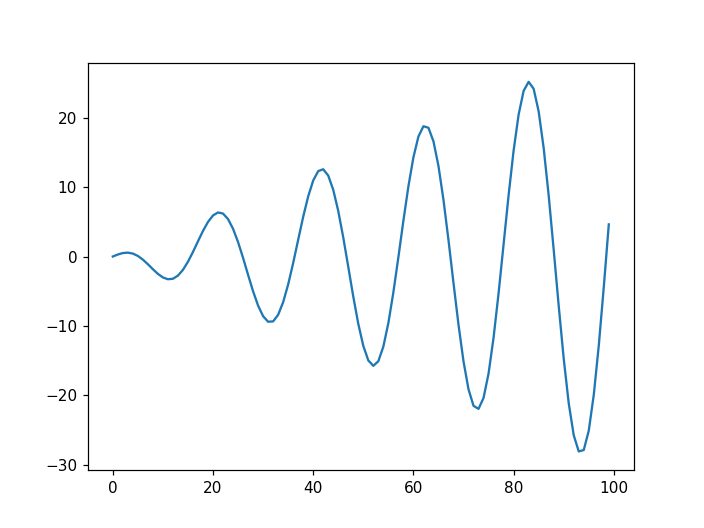

<IPython.core.display.Javascript object>


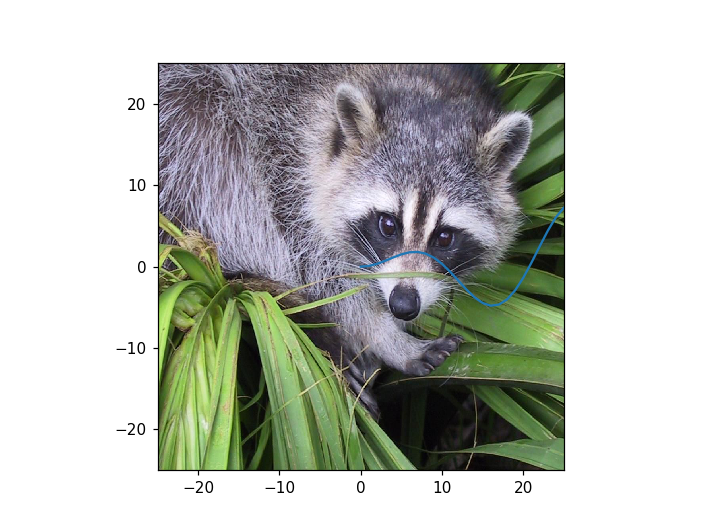

In [20]:
plt.figure()  
plt.plot(x)
plt.figure()
plt.plot(y)

In [21]:
# Esta falta por organizar
# en vez de cargar face, deberíamos usar imread

from scipy.misc import face
img = face()
print(img.shape)
plt.imshow(img, extent=[-25, 25, -25, 25])

(768, 1024, 3)


In [12]:
a = np.linspace(0, 1, 15) - 0.5
b = a[:, np.newaxis] # array broadcasting
d = np.sqrt(a**2 + b**2)
plt.imshow(d, interpolation='bicubic')
plt.colorbar()

## Histogramas

In [13]:
x = np.random.randn(1000)
# Nota: en la siguiente línea quite y ponga el ; para que vea lo que pasa:
plt.hist(x,30);    # el segundo argumento es el número de barras

In [14]:
plt.hist(x,30,cumulative=True);    # el segundo argumento es el número de barras

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Cree los puntos
n = 20
x = np.linspace(0.0, 1.0, n)
y_line = -2*x + 3
y = y_line + np.random.normal(0, 0.25, n)

# resuelva el problema de mínimos cuadrados
A = np.array([x, np.ones(n)]).T
result = np.linalg.lstsq(A, y)

# el resultado es una tupla, la solución (a,b) es el primer elemento
a, b = result[0]

# dibujar el resultado
plt.plot(x, y, 'o', label = 'puntos de la muestra')
plt.plot(x, y_line, 'r', label = 'línea original')
plt.plot(x, a*x+b, 'b', label = 'línea ajustada por mínimos cuadrados')

plt.legend()
plt.show()   # es el último comando que debe ir en un script

<IPython.core.display.Javascript object>


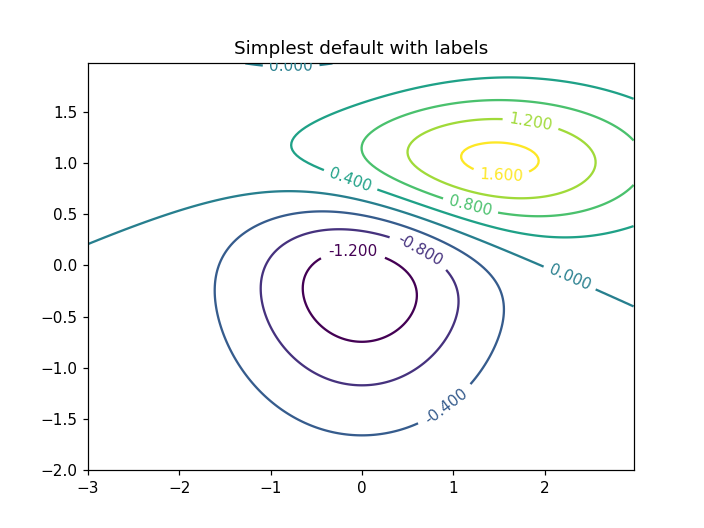

In [16]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')
plt.show()

## Gŕaficos 3D

<IPython.core.display.Javascript object>


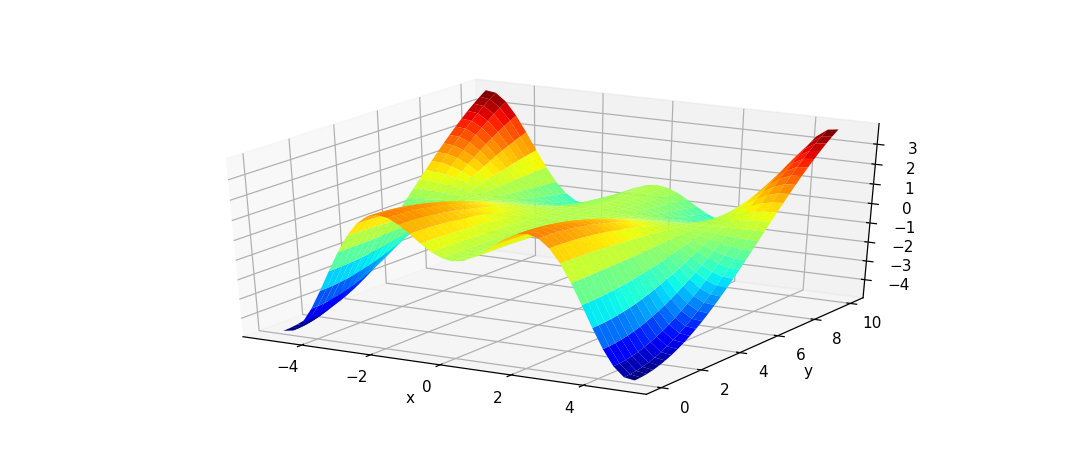

In [17]:
# Dibujo de una superficie
from mpl_toolkits.mplot3d import Axes3D

x, y = np.mgrid[-5:5:35j, 0:10:34j]
z = x*np.sin(x)*np.cos(0.25*y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'))
plt.xlabel('x')
plt.ylabel('y')

<IPython.core.display.Javascript object>


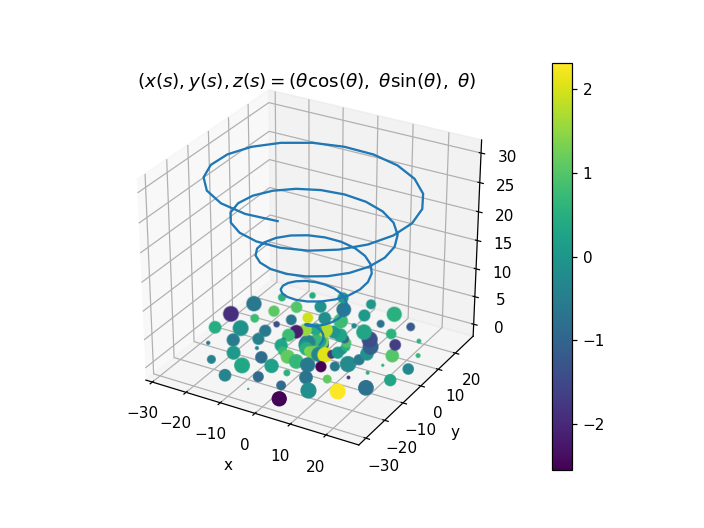

In [18]:
# Dibujo de una curva paramétrica
from mpl_toolkits.mplot3d import Axes3D

t = np.linspace(0, 30, 100)
x,y,z = t*np.cos(t), t*np.sin(t), t
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z)
plt.xlabel('x')
plt.ylabel('y')

# Observe que el título está escrito en formato de LaTeX
plt.title(r'$(x(s),y(s),z(s) = (\theta\cos(\theta),\ \theta\sin(\theta),\ \theta)$')
plt.savefig('figura.pdf', bbox_inches='tight')
plt.savefig('figura.svg') #png, pdf, ps, eps and svg.

Otros comandos
plt.contourf
pie


# Comandos para el modo interactivo

* figure()
* show(): este comando se utiliza simplemente para indicar al PYTHON que grafique los dibujos aquí (es como un pygame.display.update())

en la sección interactiva también se puede ejecutar

* plt.clf()
* plt.close()
* plt.close('all')

de forma similar a MATLAB

# Referencia

Esta presentación se basó en:
* SciPy2016 tutorial: Introduction to NumPy:
 * https://github.com/enthought/Numpy-Tutorial-SciPyConf-2016
 * https://www.youtube.com/watch?v=gtejJ3RCddE


# Tutoriales recomendados:
* “Anatomy of Matplotlib” SciPy 2017 Tutorial by Ben Root: 
    * https://www.youtube.com/watch?v=rARMKS8jE9g         
    * https://github.com/matplotlib/AnatomyOfMatplotlib
    
    
* Matplotlib tutorial by Nicolas P. Rougier: 
 * http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
 
* http://www.scipy-lectures.org/
 